# Heart Disease Prediction

## Description

The aim of this project is take the given dataset for patients with and without heart disease and use various methods to draw insight on whether new patients may, or may not, have heart disease.

### Presentation:
This document is provided in a Jupyter Notebook <i>(.ipynb)</i> format such that non-technical individuals may see the required output and make sense of the proccesses from the notes created, before and after code-cells.


### Sections:
### 1. Exploratory Analysis and Data Pre-Processing
    1.1 Age Group Sample Sizes
    1.2 Most Populus Age Groups
    1.3 Prevalence of Heart Disease in Females and Males
    1.4 Replacing Missing Data
    1.5 One-Hot-Encoding and Mapping Binary Relations
    1.6 Adressing Duplicatre Datum
    1.7 Evaluate Correlations Between Features
    
    
### 2. Decision Tree and Algorithmic Representation
    2.1 Decision Tree: Generate
    2.2 Confusion Matrix: G(n) Predicted Label's Accuracy Comparison
    2.3 Evaluate Classification
    2.4 Visual Representation
    2.5 Algorithmic Representation
    2.6 Cross-validation: Mean Accuracy At Depth (n)


### 3. Artifical Neural Networks (ANN)
    3.1 MLP Classifier: Train and Fit
    3.2 Confusion Matrix: G(n) Predicted Label's Accuracy Evaluation
    - 
    - 

### Developer Remarks
The developer is aware that more sophisticated models for predicting such illnesses exist and therefore this code should <b>NOT be used</b> within a medical setting.

The purpose of this document is to demonstrate an understanding of some  fundamental concepts, with respect to data pre-proccessing and machine learning methods.


## 1. Exploratory Analysis and Data Pre-Processing

the dataset resides within `data_heart_disease.csv`. Which is also included in this repositry.

#### Library Imports

In [1]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import plot_tree
from sklearn.tree import export_text
from sklearn import metrics
from sklearn import tree
from sklearn.datasets import load_iris
import array as arr

from pandas.api.types import is_numeric_dtype
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = pd.read_csv("data_heart_disease.csv") #dataset import

The data is represented as a pandas dataframe below.

In [2]:
pd.set_option('display.max_rows', 5)
display(data)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HRMaxGap,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172,N,0.0,Up,8,0
1,49,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
916,57,F,ATA,130.0,236.0,0,LVH,174,N,0.0,Flat,-11,1
917,38,M,NAP,138.0,175.0,0,Normal,173,N,0.0,Up,9,0


<h3 style="text-alight:left;">1.1 Age Group Sample Sizes<span style="float:right;">Exploratory Analysis</span> </h3>

Here is a brief visual aid, to help us understand the data we are working with. Each age group is represented in the histogram below, with groupings spanning every 10 years.

<b>Note: </b>The entire dataset has been evaluated and includes both female and male sexes. This visual aid gives a clear representation of age groups' sample sizes and their distribution across this dataset.

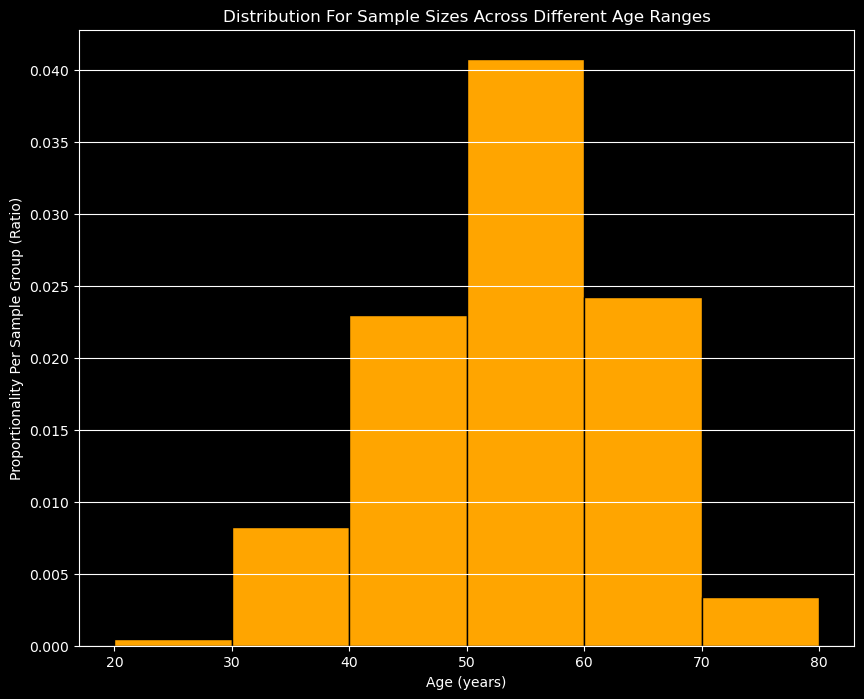

In [3]:
# Histogram
bins = [20, 30, 40, 50, 60, 70, 80]

plt.style.use('dark_background')
data.hist(column=['Age'],bins=bins, density=True, grid='True',figsize=(10,8),color='Orange',edgecolor='Black')
plt.xlabel('Age (years)')
plt.ylabel('Proportionality Per Sample Group (Ratio)')
plt.title('Distribution For Sample Sizes Across Different Age Ranges')
plt.grid(axis='x')

#### Insight

Age groups 50-60 posess the greates sample size. The reasons for this are unclear however, it is clear that our model will be most effective when applied to new candidates for evaluations, across thiss age range.

<h3 style="text-alight:left;">1.2 Most Populus Age Groups <span style="float:right;">Exploratory Analysis</span> </h3>

In [4]:
df_20_SIZE = data[(data['Age'] >= 20) & (data['Age'] < 30) ].value_counts('Age').aggregate(np.sum)
df_30_SIZE = data[(data['Age'] >= 30) & (data['Age'] < 40) ].value_counts('Age').aggregate(np.sum)
df_40_SIZE = data[(data['Age'] >= 40) & (data['Age'] < 50) ].value_counts('Age').aggregate(np.sum)
df_50_SIZE = data[(data['Age'] >= 50) & (data['Age'] < 60) ].value_counts('Age').aggregate(np.sum)
df_60_SIZE = data[(data['Age'] >= 60) & (data['Age'] < 70) ].value_counts('Age').aggregate(np.sum)
df_70_SIZE = data[(data['Age'] >= 70) & (data['Age'] < 80) ].value_counts('Age').aggregate(np.sum)

dfArray = [df_20_SIZE,df_30_SIZE,df_40_SIZE,df_50_SIZE,df_60_SIZE,df_70_SIZE]

i=0
group=0
groupIndex=0
while i < len(dfArray):
    if group < dfArray[i]:
        groupIndex = i
        group = dfArray[i]
    i+=1
print("group:",groupIndex+1, "\b. Set cardinality:",group)


#group = data.groupby(by=['Age']).size()
#group.aggregate(np.sum)

group: 4 . Set cardinality: 374


374

<h3 style="text-alight:left;">1.3 Prevalence of HD in Females and Males<span style="float:right;">Exploratory Analysis</span> </h3>

The below cell compares the prevalence of patients with heart disease, when grouping this data for female and male patients.

In [5]:
#splice set in-two, for female and male
data_female = data[data['Sex']=='F']
data_male   = data[data['Sex']=='M']

#flatten series into vector array
data_female_count = np.sort(data_female.value_counts(['HeartDisease']),axis=None)
data_male_count = np.sort(data_male.value_counts(['HeartDisease']),axis=None)

#set cardinality
data_female_shape = data_female.shape[0]
data_male_shape = data_male.shape[0]
sample_size_female = data_female_shape
sample_size_male = data_male_shape

#divide confirmed cases by set cardinality (rows)
data_female_percentage = np.divide(data_female_count[1],data_female_shape)
data_male_percentage = np.divide(data_male_count[1],data_male_shape)

print("Previlence of Heart Disease Amoungst Females and Males.\n\n-------------------------------------\n| Group\t\t (%)\t Sample Size|\n-------------------------------------")
print("| Females:\t",np.floor(data_female_percentage*100),"\t",sample_size_female,"\t    |")
print("| Males:\t",np.floor(data_male_percentage*100),"\t",sample_size_male,"\b\t    |\n-------------------------------------")

print("\nSample Size:\n\tFemales:",sample_size_female,"\n\tMales:\t",sample_size_male)

Previlence of Heart Disease Amoungst Females and Males.

-------------------------------------
| Group		 (%)	 Sample Size|
-------------------------------------
| Females:	 74.0 	 193 	    |
| Males:	 63.0 	 725 	    |
-------------------------------------

Sample Size:
	Females: 193 
	Males:	 725


Sex: Females, 11% greater previlence of heart disease, over males. (Females = 74%, Males = 63%) previlance.
Each percentage is with respect to the complete cardinality for each set, whereby |Females| == 193, |Males| == 725.

<h3 style="text-alight:left;"> Numerical Features <span style="float:right;">Exploratory Analysis</span> </h3>
The below cells highlights the ranges for the numerical features within the dataset.

The following cell illustrates the ranges of each of the numerical features in the dataset. Pay close attention to the skew for each box.


Numerical Feature with the largest range is cholesterol: 518.0 




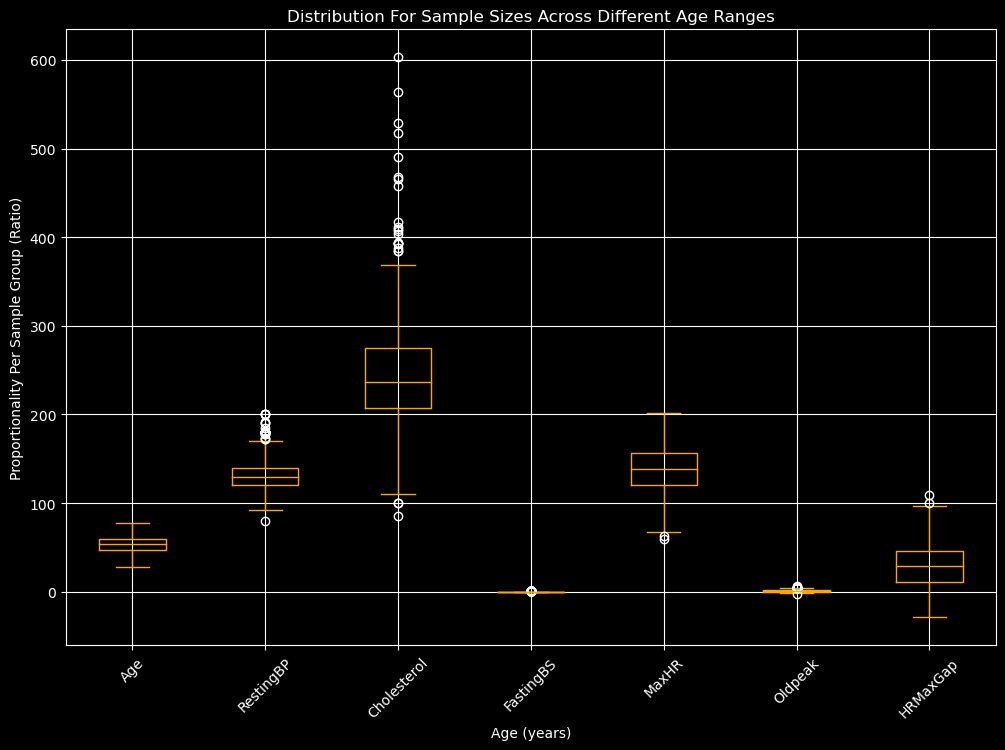

In [6]:
# Find all numeric features for entire set
numerics = ['int16','int32','int64','float16','float32','float64']
data_numerics = data.select_dtypes(include=numerics)
range_min = data_numerics.min().ravel()
range_max = data_numerics.max().ravel()

# create columns array
features_are_numeric = list(data_numerics)
graph = pd.DataFrame({"Range": range_max}, index=features_are_numeric)

# Box Plot
plt.style.use('dark_background')
plt.figure(figsize=(12,8))
ax = data[features_are_numeric].drop(['HeartDisease'],axis=1).boxplot(color='Orange',grid=True) #'Sex','ExerciseAngina',
plt.grid(axis='x')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.xlabel('Age (years)')
plt.ylabel('Proportionality Per Sample Group (Ratio)')
plt.title('Distribution For Sample Sizes Across Different Age Ranges')
plt.xticks(rotation=45)
plt.grid(axis='x')

# work out range for cholesterol
print("\nNumerical Feature with the largest range is cholesterol:",data['Cholesterol'].max() - data['Cholesterol'].min(),"\n\n")

Feature Cholesterol has the largest numerical
range of 518.

<h3 style="text-alight:left;">1.4 Replacing Missing Data<span style="float:right;">Pre-Processing</span> </h3>

This section explores missing data, throghout our dataset and intends to estimate suitable numerical and or categorical replacements.

In [7]:
if (data.isnull().values.any() == True):
    columns_with_NaN = data.columns[data.isnull().any()]
    NaN_totals = data.isnull().sum()
    NaN_totals = list(filter(lambda num: num != 0, NaN_totals))
    print("NaN present within:", list(columns_with_NaN),"with totals", NaN_totals, "respectively.")

else:
    print("No NaN values in dataset")

#shows all columns with total NaN count
#print(data.isnull().sum().max)

NaN present within: ['RestingBP', 'Cholesterol'] with totals [1, 172] respectively.


(RestingBP, Cholesterol). Missing |(1,172)| values, respectively.

In [8]:
pd.set_option('display.max_rows', 10)

columns = list(data.columns)
data_female_HD1            = data_female.loc[data_female['HeartDisease']==1]
data_male_HD1              = data_male.loc[data_male['HeartDisease']==1]
data_female_HD0            = data_female.loc[data_female['HeartDisease']==0]
data_male_HD0              = data_male.loc[data_male['HeartDisease']==0]

#redefine for clarity
columns_with_NaN = data.columns[data.isnull().any()]

#split female + Male into two groups, HeartDisease=1 and = 0
#"HD0" = without heart disease, "HD1" with heart disease
#"*feature0" = RestingBP, "*feature1" = Cholesterol

for i in range(0,len(columns_with_NaN)):
    for j in range(0,len(columns_with_NaN)):
        exec(f'data_female_feature{j}_HD{i} = data_female_HD{i}[columns_with_NaN[j]].to_frame()') #build Rbp and Chol female
        exec(f'data_male_feature{j}_HD{i} = data_male_HD{i}[columns_with_NaN[j]].to_frame()')     #build Rbp and Chol female
        exec(f'data_female_mean{j}_HD{i} = data_female_feature{j}_HD{i}.mean().round(0)')         #build mean variables female
        exec(f'data_male_mean{j}_HD{i} = data_male_feature{j}_HD{i}.mean().round(0)')             #build mean variables male 
        
#calculate percentage difference in features for patients with heart disease vs. lose without
difference_femalesRbp = np.divide(data_female_mean0_HD1 - data_female_mean0_HD0, data_female_mean0_HD1)*100
difference_femalesCho = np.divide(data_female_mean1_HD1 - data_female_mean1_HD0, data_female_mean1_HD1)*100
difference_malesRbp   = np.divide(data_male_mean0_HD1 - data_male_mean0_HD0, data_male_mean0_HD1)*100
difference_malesCho   = np.divide(data_male_mean1_HD1 - data_male_mean1_HD0, data_male_mean1_HD1)*100
#print("Difference RestingBP", round(difference_femalesCho,1),"%")

#for all columns with NaN values, fill with rounded mean values, to quantize data, for feature0_HD0, feature1_HD0, feature0_HD1, feature1_HD1
#for males and females
for i in range(0,len(columns_with_NaN)):
    for j in range(0,len(columns_with_NaN)):
        exec(f'data_female_feature{j}_HD{i} = data_female_feature{j}_HD{i}.fillna(value=data_female_mean{j}_HD{i})')
        exec(f'data_male_feature{j}_HD{i} = data_male_feature{j}_HD{i}.fillna(value=data_male_mean{j}_HD{i})')
        
for i in range(0,data.shape[0]):
    heartTruth = data.iloc[:,12]==1; sexTruth = data.iloc[:,1]=='F'
    
        #female HD=1, Chol
    if ( (data.iloc[:,4].isna()[i] == True) & heartTruth[i] & sexTruth[i]):
        data.iloc[i,4] = data_female_mean1_HD1[0]
        
        #female HD=0, Chol
    elif ( (data.iloc[:,4].isna()[i] == True) & (not heartTruth[i]) & sexTruth[i]):
        data.iloc[i,4] = data_female_mean1_HD0[0]
    
        #male HD=1, Chol
    elif ( (data.iloc[:,4].isna()[i] == True) & heartTruth[i] & (not sexTruth[i])):
        data.iloc[i,4] = data_male_mean1_HD1[0]
        
        #male HD=0, Chol
    elif ( (data.iloc[:,4].isna()[i] == True) & (not heartTruth[i]) & (not sexTruth[i])):
        data.iloc[i,4] = data_male_mean1_HD0[0]
        
    else:
        continue
        
    if( (data.iloc[:,3].isna()[i] == True) ):
        data.iloc[i,3] = data_male_mean0_HD1[0]
        
display(data)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HRMaxGap,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172,N,0.0,Up,8,0
1,49,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,15,1
2,37,M,ATA,130.0,283.0,0,ST,98,N,0.0,Up,85,0
3,48,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,64,1
4,54,M,NAP,150.0,195.0,0,Normal,122,N,0.0,Up,44,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110.0,264.0,0,Normal,132,N,1.2,Flat,43,1
914,68,M,ASY,144.0,193.0,1,Normal,141,N,3.4,Flat,11,1
915,57,M,ASY,130.0,131.0,0,Normal,115,Y,1.2,Flat,48,1
916,57,F,ATA,130.0,236.0,0,LVH,174,N,0.0,Flat,-11,1


### Methodology

The data has been split into 4 subsets: Males+(HeartDisease= T or F ) AND Female+(HeartDisease= T or F ).
   
   More plainly:
    
        - Females With Heart Disease
        - Females Without Heart Disease
        - Males With Heart Disease
        - Males Without Heart Disease
    
The mean is calculated for the 4 subsets, then replaced into the original dataset, whereby the grouping is the classification specified by the 4 subsets above.

This will result in a marginal gain in improvement (vs. replacing all NaN values a strict mean value for an entire feature using fillna() ) in model performance however, given the potential application of the model, and thus the potential threat-to-life of an incorrect prediction and its severity - Hence forming the justification for this decision.

It is important to note that from the box plots given in section 1.3, the median for the numerical feature 'Cholesterol' is positively-skewed. Later, it becomes clear that the dataset 

### Justification

<b>Percentage difference</b> <i>(calculated to 3 sig.fig)</i> between those with heart disease, and those without, in male and female patients <b>(approx.)</b>, for a given feature.

| Sex      |Difference      | Feature   | 
|:--------:| -------------:|-------------:|
| Female     |10.7%      | Cholesterol|
| Male       |5.9%       | Cholesterol|
| Female     |9.3%       | RestingBP|
| Male       |2.0%       | RestingBP|

<h3 style="text-alight:left;">1.5 One-Hot Encoding<span style="float:right;">Pre-Processing</span> </h3>

Because we will be using classifiers which require a numerical binary representation for categorical features, it is therefore important that the specified features be One-Hot Encoded, such that they may be correctly classified. The alternative is loosing potentially useful information. As can be seen in section ......... 'Chest Pain Type' is a key decision boundry, when factoring whether or not an indiviidual has heart disease.

For those categorical features which have a one-to-one mapping to binary, these have simply been mapped using .map().

### Objective:
In the below cell, the intention is to identify the categorical features and build an array containing the names of said features.

In [9]:
catList = []
column_bools = data.applymap(np.isreal).all()
i=0
for col in data.columns:
    if (column_bools[col] == False):
        catList.append(col)
    else:
        continue
print(catList)

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


Sex, ChestPainType, RestingECG, ExerciseAngina, ST_Slope

In [10]:
if is_numeric_dtype(data['Sex'])==False:
    data['Sex'] = data['Sex'].map({'F':1,'M':0})
    data['ExerciseAngina'] = data['ExerciseAngina'].map({'Y':1,'N':0})
        
# alternative method used for verifying numerical features
catNumeric = []
column_numeric = data.applymap(np.isreal).all()
i=0
for col in data.columns:
    if (column_numeric[col] == True):
        catNumeric.append(col)
    else:
        continue

# One-hot Encoding
data = pd.get_dummies(data)
display(data)

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HRMaxGap,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,0,140.0,289.0,0,172,0,0.0,8,0,0,1,0,0,0,1,0,0,0,1
1,49,1,160.0,180.0,0,156,0,1.0,15,1,0,0,1,0,0,1,0,0,1,0
2,37,0,130.0,283.0,0,98,0,0.0,85,0,0,1,0,0,0,0,1,0,0,1
3,48,1,138.0,214.0,0,108,1,1.5,64,1,1,0,0,0,0,1,0,0,1,0
4,54,0,150.0,195.0,0,122,0,0.0,44,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,110.0,264.0,0,132,0,1.2,43,1,0,0,0,1,0,1,0,0,1,0
914,68,0,144.0,193.0,1,141,0,3.4,11,1,1,0,0,0,0,1,0,0,1,0
915,57,0,130.0,131.0,0,115,1,1.2,48,1,1,0,0,0,0,1,0,0,1,0
916,57,1,130.0,236.0,0,174,0,0.0,-11,1,0,1,0,0,1,0,0,0,1,0


Three methods used.
1. <b>Map()</b> values of features with an existing binary relationship, for; Sex: (Female,Male) to (1,0) respectively and ExerciseAngina (Y,N) to (1,0) respectively.
2. <b>One-hot encoding</b>, e.g using binary encoding on all remaining categorical features.
3. <b>Dropping</b> categorical data, with non-includeable/excludate datum

### map() Justification

- map has already been applied, to reduce the number of features, preventing overfitting. After assessing data, using just one-hot encoding, overfitting was not found, so although this isn't strictly necessary, it marginally increases both models' testing accuracy.

### Distribution of Numerical Data

In [11]:
data.describe()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HRMaxGap,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.210240,132.542484,245.294118,0.233115,136.809368,0.404139,0.887364,29.679739,0.553377,0.540305,0.188453,0.221133,0.050109,0.204793,0.601307,0.193900,0.068627,0.501089,0.430283
std,9.432617,0.407701,17.989996,53.477424,0.423046,25.460334,0.490992,1.066570,23.530853,0.497414,0.498645,0.391287,0.415236,0.218289,0.403770,0.489896,0.395567,0.252957,0.500271,0.495386
min,28.000000,0.000000,80.000000,85.000000,0.000000,60.000000,0.000000,-2.600000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,0.000000,130.000000,248.000000,0.000000,138.000000,0.000000,0.600000,29.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,60.000000,0.000000,140.000000,269.000000,0.000000,156.000000,1.000000,1.500000,46.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,77.000000,1.000000,200.000000,603.000000,1.000000,202.000000,1.000000,6.200000,109.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<h3 style="text-alight:left;">1.6 Adressing Duplicatre Datum<span style="float:right;">Pre-Processing</span> </h3>

To not further intorduce biases into the data, all duplicate data needs to be removed. The following cell checks for any existing duplicates

In [12]:
data.duplicated().sum()

0

No duplicates identified.

In [13]:
catNumeric

['Age',
 'Sex',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'ExerciseAngina',
 'Oldpeak',
 'HRMaxGap',
 'HeartDisease']

In [14]:
catList

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

For all numerical features from the dataset, such that the set excludes features from catList, specified in sec. 1.5 One-Hot Ecoding

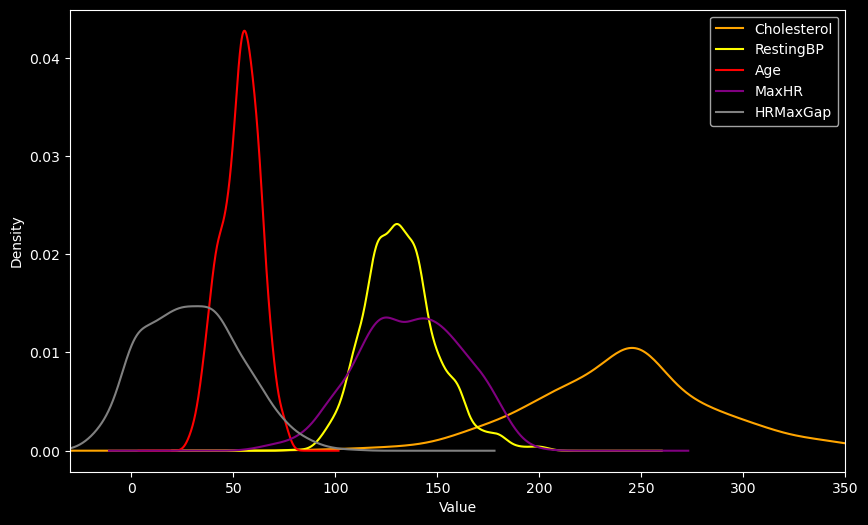

In [15]:
# Check distribution of numerical features, ensure everything looks normal
data['Cholesterol'].plot(kind='kde',color='Orange',figsize=[10,6])#,edgecolor='Black')
data['RestingBP'].plot(kind='kde', color='Yellow')
data['Age'].plot(kind='kde', color='Red')
data['MaxHR'].plot(kind='kde', color='purple')
data['HRMaxGap'].plot(kind='kde', color='grey')

plt.style.use('dark_background')
plt.xlim([-30,350])
plt.legend(loc='upper right')
plt.xlabel("Value")

plt.show()

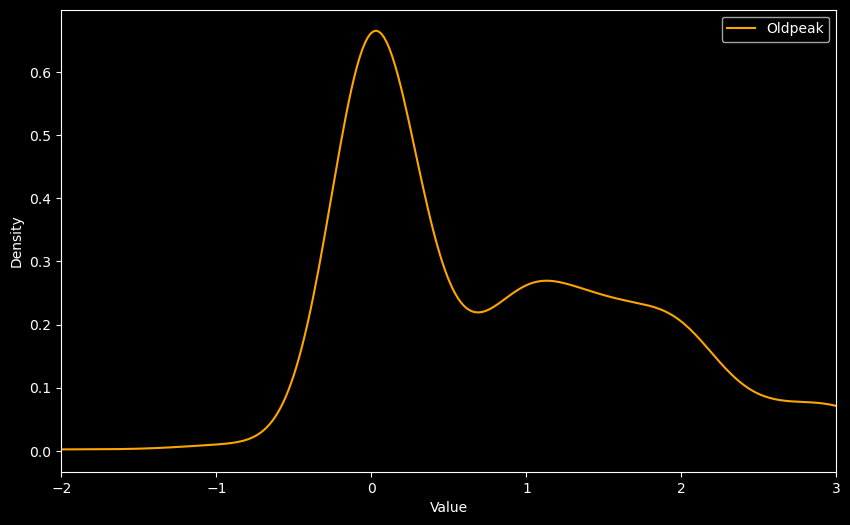

In [16]:
# Check distribution of numerical features
data['Oldpeak'].plot(kind='kde',color='Orange',figsize=[10,6])

plt.style.use('dark_background')
plt.xlim([-2,3])
plt.legend(loc='upper right')
plt.xlabel("Value")

plt.show()

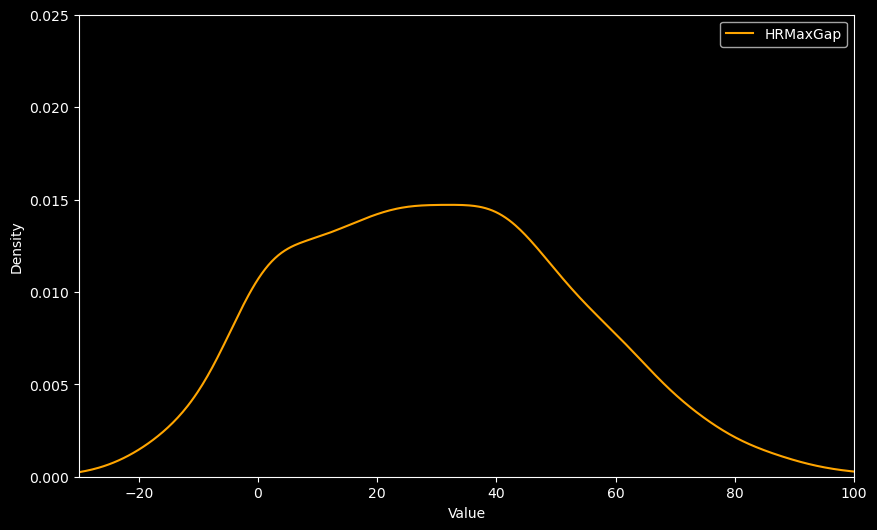

In [17]:
# Check distribution of numerical features
data['HRMaxGap'].plot(kind='kde',color='Orange',figsize=[10,6])

plt.style.use('dark_background')
plt.xlim([-30,100])
plt.ylim([0,0.025])
plt.legend(loc='upper right')
plt.xlabel("Value")

plt.show()

['Age', 'Sex', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'HRMaxGap', 'HeartDisease']


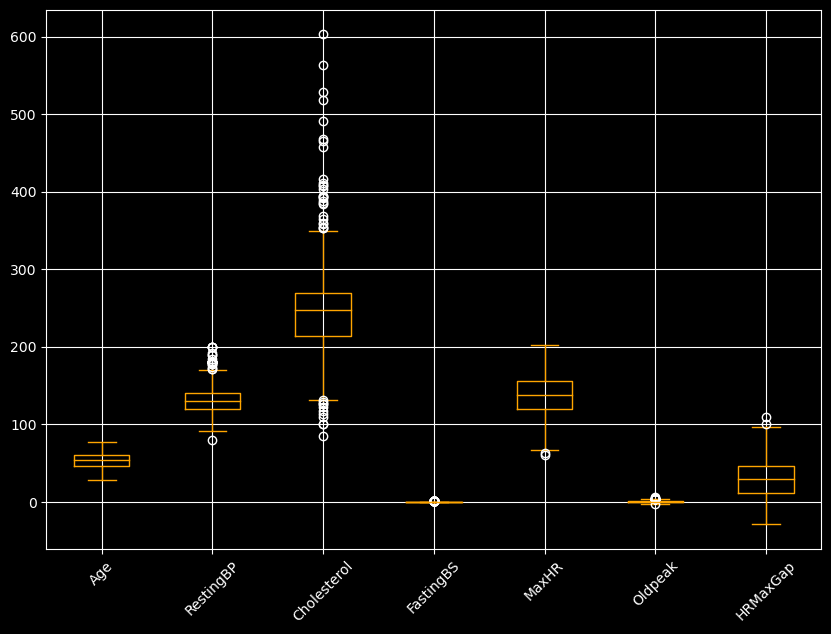

In [18]:
#Evaluating numeric feature distrbution, skewed-median.

print(catNumeric)

plt.figure(figsize=(10,7))
#data.drop(['ID','Sex','ExerciseAngina','HeartDisease'],axis=1).boxplot(color='Orange')
data[catNumeric].drop(['Sex','ExerciseAngina','HeartDisease'],axis=1).boxplot(color='Orange')
#.drop(['Sex','ExerciseAngina','HeartDisease'],axis=1).boxplot(color='Orange')
plt.xticks(rotation=45)
plt.show()

### Sample Sizes for Females and Males

In [19]:
print("Propportion of females in dataset:\t",round(sample_size_female / (sample_size_female + sample_size_male),2)*100,"\b% \nPropportion of males in dataset:\t", round(sample_size_male / (sample_size_female + sample_size_male),2)*100, "\b%")

Propportion of females in dataset:	 21.0 % 
Propportion of males in dataset:	 79.0 %


<h3>1.7 Evaluate Correlations Between Features<span style="float:right;">Exploratory Analysis</span></h3>

The below cell is being used to gain a general sense of what the model might produce, for key the features

In [20]:
pd.set_option('display.max_rows', 1000)
corr = data.corr().unstack().sort_values(kind='quicksort')
corr[(corr>0.4) & (corr<1)].drop_duplicates()
#array3[(array3>=20)&(array3<=30)]

HeartDisease       Oldpeak           0.403951
Oldpeak            ExerciseAngina    0.408752
ChestPainType_ASY  ExerciseAngina    0.430034
ExerciseAngina     HeartDisease      0.494282
ChestPainType_ASY  HeartDisease      0.516716
ST_Slope_Flat      HeartDisease      0.554134
dtype: float64

Steps Taken:
1. Replacing dataFrame index with ID's for each datum.
2. Check distribution of data, to see if the distribution is normal and to see if the feature median is positively or negatively skewed
3. For all features, where data normality doesn't give much insight, sex has been paired with each of these features.

Justification:
1. Such that each datum is explicitly defined with an ID, adhering to best practice.
2. Distribution assesed visually to decide wether binning the data is necessary, for training.
3. Due to the nature of data, each feature has been group with Sex, to see if there is any associatsion with 'Sex', the feature and Heart Disease. Points for consideration whilst moving through model construction phase

<h2>2.1 Decision Tree: Generate<span style="float:right;">Decision Tree</span></h2>

This section concerns building and evaluating a decision tree, taking the input features for the dataset and generating predicted labels for those inputs.

In [21]:
#1. Normalise Features and Fit Scaler to data
normalise = MinMaxScaler().fit(data)

#2. Transform data, using the normalised values
trans = normalise.transform(data)

#3. Create New DataFrame with columns from old DataFrame and transform new
data_trans = pd.DataFrame(trans, columns=data.columns)
#df_trans = pd.DataFrame(trans,columns=data.drop('ID',axis=1).columns)

#3. Make a .copy() of new DataFrame
hd_data = data_trans.copy()

#4. Set up x, y perameters, for training
y = hd_data['HeartDisease']
x = hd_data.drop('HeartDisease',axis=1) # excluding heart disease feature

#5. Split data into train/test, seed selection
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)

#6. build the Decision Tree "tree_d"
tree_d = DecisionTreeClassifier(max_depth = 3, random_state = 1)

#7. Fit the decision tree to the training data
tree_d.fit(x_train,y_train)

#8/9. Assess performance, evaluate prediction
y_predict                 = tree_d.predict(x_test)
y_predict_test_metric_dt  = metrics.accuracy_score(y_test, y_predict)

#8/9. For later comparison between Decision Tree and ANN
y_predict_train           = tree_d.predict(x_train)
y_predict_train_metric_dt = metrics.accuracy_score(y_train,y_predict_train)

#10. use metrics to assess accuracy
print('Testing accuracy: \t', metrics.accuracy_score(y_test, y_predict))

Testing accuracy: 	 0.8514492753623188


##### Perameters and Processes:
1. Normalise the features.
2. Replace all numeric features' datum with the normalised data.
3. Entirely copy the dataframe to a new variable.
4. Assign feature of interest/to be predicted (Heart Disease) to y-axis and all other features (excluding the feature of interest) to the x-axis.
5. Split data into test and training set, 70% training, 30% testing, seed random_state=1, such that results are reproducable.
6. Create decision tree, from (x and y)-(trainig and testing) data, seed random_state, so results reproducable.
7. fit decision tree, using the training data (train the model)
8. make a prediction, using the model, on the y-testing data
9. Score accuracy of model y and x axis (latter will cross-validate using k-folding).
<hr>

#### Justification:
1. Such that each feature may be evaluated  with respect to one another by the <b>tree_d</b> and <b>MLPClassifier</b>. Normalisation is required because the entropy (information gain) or gini value calculated, both require numerical features to be scaled between a range (0-1).
2. To swap old data to normalised data.
3. So that the original dataFrame is preserved, producing a new frame to manipulate.
4. Assing <b>Heart Disease</b> to the y-axis, and all other features to x-axis for prediction for both models
5. Do not wish to train on entire dataset as the model will perform poorly in the real-world. seed ranom_state=1, such that results are reproducable. This is important as the insights given from this analysis can be analysed and reasoning, with the reasoning remaining just. Additionally, others may reproduce results.

###### 9. Important to evaluate, at a high-level, the overall accuracy of the model. Useful for determining overfitting and or underfitting. Use cross-validation later, k-fold 3-5 folds


<h3 style="text-alight:left;">2.2 Confusion Matrix: G(n) Predicted Labels Accuracy Comparison<span style="float:right;">Decision Tree</span> </h3>

Let F(n) represent the true label.

Let G(n) represent the predicted label.

For all G(n) an evaluation for the difference in accruacy.

The cell below generates a confusion matrix. The purpose here is to evaluate and compare the prediction accuracy for each label, given <b><i>G(n) | G(n) is predicted label</i></b> for both cases. 

is to assess the decision trees predicted label G(n) against the actual label <b>F(n) | Error = F(n) - G(n)</b>.

how effective the decision tree is in classifying whether patients have heart disease or not. 

In [22]:
cm_tree = metrics.confusion_matrix(y_test,y_predict)

<h3 style="text-alight:left;">2.3 Evaluate Classification<span style="float:right;">Decision Tree</span> </h3>

The cell below evaluates the accuracy of the trained decision tree. Further exploratory analysis is required to understand whether this model is better at classifying patients with Heart Disease, or patients without.

Percentage difference: prediction accuracy With Heart Disease Vs. Without: 

(1): Patients Correctly Predicted Without Heart Disease: 79.82 %
(2): Patients Correctly Predicted With Heart Disease:	 88.62 %
							 ------
					(2) - (1)    =	 8.8 %


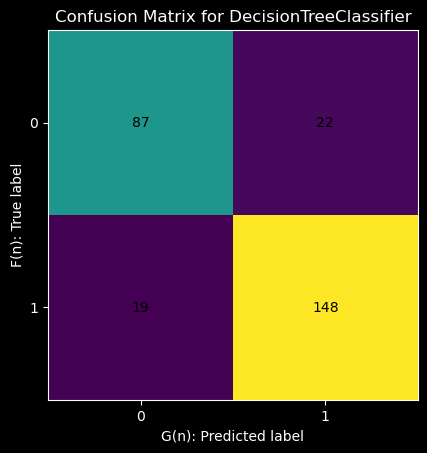

In [23]:
def cf_matrix(mat, t_name, model_name):
    
    fig, ax = plt.subplots()
    im = ax.imshow(mat)
    
    ax.set_xticks(range(0,len(t_name)))
    ax.set_yticks(range(0,len(t_name)))
    ax.set_xticklabels(t_name)
    ax.set_yticklabels(t_name)

    for i in range(0,len(t_name)):
        for j in range(0,len(t_name)):
            text = ax.text(j, i, mat[i, j], ha="center", va="center", color="k")
    plt.ylabel('F(n): True label')
    plt.xlabel('G(n): Predicted label')# [(0,0) (0,1)
#  (1,0), (1,1)]
    plt.title(f"Confusion Matrix for {model_name}")
    
cf_matrix(cm_tree,[0,1],'DecisionTreeClassifier')

without_hd = round(np.divide(cm_tree[0][0],cm_tree[0][0]+cm_tree[0][1])*100,2)
with_hd = round(np.divide(cm_tree[1][1],cm_tree[1][0]+cm_tree[1][1])*100,2)

print("Percentage difference: prediction accuracy With Heart Disease Vs. Without: \n")
print("(1): Patients Correctly Predicted Without Heart Disease:",round(np.divide(cm_tree[0][0],cm_tree[0][0]+cm_tree[0][1])*100,2),"\b%")
print("(2): Patients Correctly Predicted With Heart Disease:\t", round(np.divide(cm_tree[1][1],cm_tree[1][0]+cm_tree[1][1])*100,2),"\b%")
print("\t\t\t\t\t\t\t ------")
print("\t\t\t\t\t(2) - (1)    =\t",round(np.subtract(with_hd,without_hd),2),"\b%")

This particular Decision Tree is <i><b>better</b></i> at predicting patients (<b>HD = <i>True</i></b>)with Heart Disease by approx <b>8.80%</b> over its prediction accuracy for those without Heart Disease (<b>HD = <i>False</i></b>).

Decision Tree: (max depth = 3) (Train/Test Split = 0.7/0.3)

Accuracy:

- <b>HD = <i>True</i></b> ~89% Accuracy   
- <b>HD = <i>False</i></b> ~80% Accuracy
    
    

<b><i>~ 9% Better</i></b> at predicting those with Heart Disease

<h3 style="text-alight:left;">2.4 Visual Representation <span style="float:right;">Decision Tree</span> </h3>

The bellow cell draws the decision tree to aid the reader in understanding the decision boundries for classification

By extracting the rule set for this decision tree, an algorithm (conditional statement) can be produced, as presented in sec. 2.5. This conditional statement represent the decision bountries used in the classification of patients with or without Heart Disease.

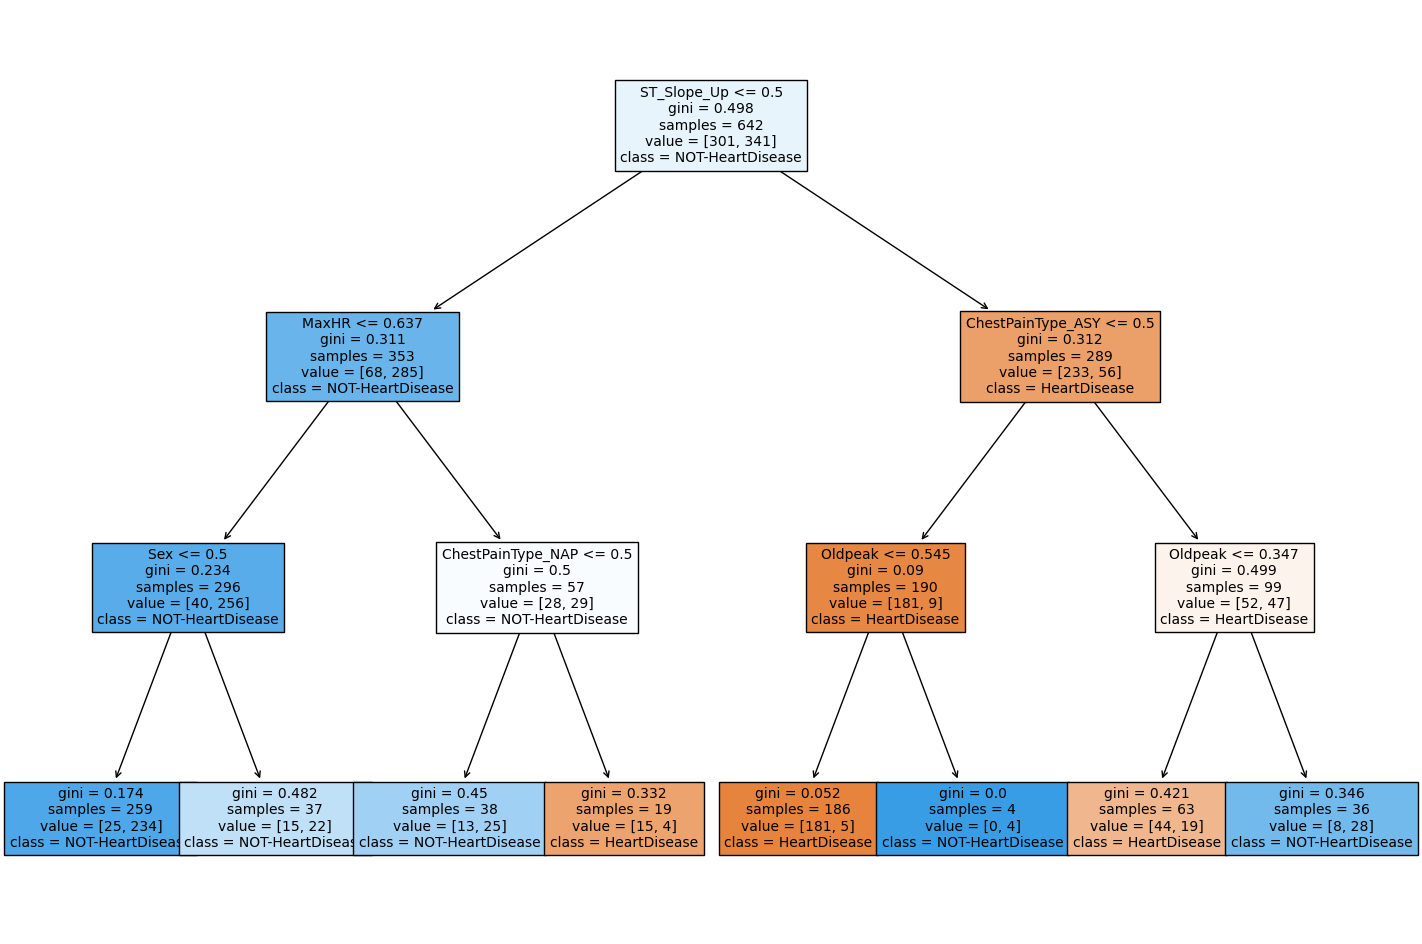

In [24]:
plt.style.use('default')

HeartDisease_features = list(x_train.columns)
HeartDisease_Class    = ['HeartDisease','NOT-HeartDisease']
plt.figure(figsize    =(18,12))
plot_tree(tree_d, feature_names = HeartDisease_features, class_names = HeartDisease_Class, filled=True,fontsize=10)

plt.show()

<h3 style="text-alight:left;">2.5 Algorithmic Representation <span style="float:right;">Decision Tree</span> </h3>


The key features, in order of priority is: ST_Slope_UP, MaxHR, ChestPainType_ASY

    if ST_Slope_Up <= 0.50
        if MaxHR <= 0.64
            if Sex_M <= 0.50
                HeartDisease = 0

            else:
                if Sex_M > 0.50
                    HeartDisease = 0
        else:
            if MaxHR > 0.64
                if ChestPainType_NAP <= 0.50
                    HeartDisease = 0

                if ChestPainType_NAP >  0.50
                    HeartDisease = 1

    else:
        if ST_Slope_Up >  0.50
            if ChestPainType_ASY <= 0.50
                if Oldpeak <= 0.55
                    HeartDisease = 1

                else:
                    if Oldpeak >  0.55
                        HeartDisease = 0
            else:
                if ChestPainType_ASY >  0.50
                    if Oldpeak <= 0.35
                        HeartDisease = 1

                    else:
                        if Oldpeak >  0.35
                        HeartDisease = 0

<h3 style="text-alight:left;">2.6 Cross-validation: Mean Accuracy At Depth (n)<span style="float:right;">Decision Tree</span> </h3>

In the below cell, the accuracy of the decision tree has been evaluated, using cross validation, at multiple different depths. This procedure has informed that the approperiate accuracy at a given depth.

As is observed, beyond three layers the accuracy drops, when evaluated against the test split for the data. This is most likely due to overfitting to the training data, meaning it will perform better on test evaluation by comparison to real world data, that is not a member of this set.

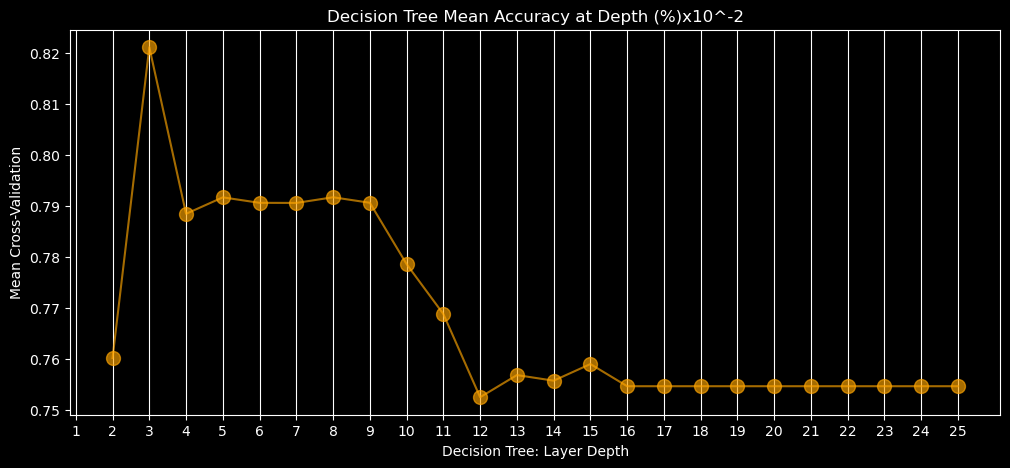

In [25]:
cv_score = list()
depth_values = range(2,26)

for d in depth_values:
    t_model_k = DecisionTreeClassifier(max_depth=d,random_state=1)
    score     = cross_val_score(t_model_k, x, y, cv=5, scoring='accuracy')
    
    mean_score = score.mean()
    cv_score.append(mean_score)

plt.style.use('dark_background')
plt.figure(figsize=(12,5))
plt.plot(depth_values, cv_score, '-o', markersize=10,alpha=0.65,color='Orange')
plt.ylabel("Mean Cross-Validation")
plt.xlabel("Decision Tree: Layer Depth")
plt.title("Decision Tree Mean Accuracy at Depth (% x10^-2))")
plt.grid(axis='x')
plt.xticks(np.arange(1, 26, 1))
plt.show()

The max_depth of the decision tree <b>tree_d</b> is decidedly a depth of '3' ( n = max_depth = 3 ).

This is confirmed by the experiment conducted with the scatter-plot above.

The cross_validation method used is k-folding, whereby the training accuracy is assesed over a k-fold, k=5. This is to remove as much bias as possible.

To verify the information above, an experiment was conducted to evaluate the overfitting bias produced by a greater decision tree max_depth. As an overview, the higher the decision-tree depth, the greater the training accuracy and lower the testing accuracy, as layer-depth decreases from 6-folds to 3-folds the disparity between the two accuracies decreases until settling at: 

### Decision Tree Depth (max_depth=3)

    - (tree_d), Training Accuracy:     86.14%
    - (tree_d), Testing Accuracy: 	 85.14%
    
### Decision Tree Depth (max_depth=6)

    (tree_d), Training Accuracy: 	  92.99%
    (tree_d), Testing Accuracy: 	   78.62%
    
<i>(MPLClassifier unaffected by this change)</i>

In addition, the reasoning behind max_depth=3, has been determined using a cost/benefit analysis, informed by the plot above.
- Using an increased max_depth perameter, DOES result in overfitting (as demonstrated 14.37% disparity between max_depth = 6 layers, between testing and training prediction accuracy whereby cardinalitty for |train| > |test|). The disparity between the accuracy for classification, against the train and test split with a positive bias to the training set indicates overfitting.

- Using an increase max_depth means, by and large, reduces the clarity of the perameters tree_d produces and thus it become more difficult to gain a clear understanding of a better approximation for decision boundaries. 
- Using an increased max_depth peramater will require greater computational resources,cost,energy consumed, with only a marginal performance gain, as can be seen above.

### Summary 
max_depth > 3 is costly, reduces clarity, thus degrading the insight gain by the model, and primarily, reduces the effectiveness of the models' performance in the real world.

<h3 style="text-alight:left;">3. Artificial Neural Network (ANN)<span style="float:right;">ANN</span> </h3>

The section explores the same data as the prvious two however using Artificial Neural Networks with Perceptron classifiers.

As before, the same input features will be inputted, a network formed, and the sci-kit library MLP Classifier used, the itterate the function, adjusting perceptron weights.

At the end of this section the True Label F(n) will ne compared against the predicted label G(n).

Finally, this accuracy for each predicted label will be compared with the decision tree, to determine which model is most effective for a given classification.

<h3 style="text-alight:left;">3.1 MLP Classifier: Train and Fit<span style="float:right;">ANN</span> </h3>

In [26]:
# Define max epochs
max_it = 1000

# Select Classifier and Hyperparameter
mlp = MLPClassifier(hidden_layer_sizes=(4,3), max_iter=max_it,random_state=1)

# Fit the model
mlp.fit(x_train,y_train)

MLPClassifier(hidden_layer_sizes=(4, 3), max_iter=1000, random_state=1)

1. Hyperperameter selected: hidden_layer_sizes, with two hidden layers, layer 1: 4 neurons, 
   layer 2: 3 neaurons.
2. Maximum epochs, set to 1000 itterations, to avoid overfitting.
3. Seeded random state for result reproducability.

<h3 style="text-alight:left;">3.2 Confusion Matrix: G(n) Predicted Label's Accuracy Evaluation
<span style="float:right;">ANN</span> </h3>

Training Accuracy: 	 0.8753894080996885
Testing Accuracy: 	 0.8659420289855072
Percentage difference: prediction accuracy With Heart Disease Vs. Without: 

(1): Patients Correctly Predicted Without Heart Disease: 85.32 %
(2): Patients Correctly Predicted With Heart Disease:	 87.43 %
							 ------
					(2) - (1)    =	 2.11 %


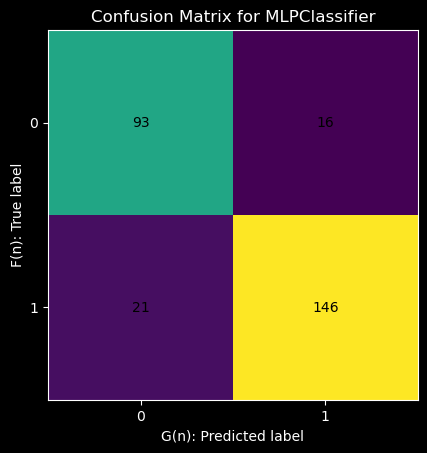

In [32]:
# Calculate testing and Training accuracy
y_predict_test_mlp = mlp.predict(x_test)
y_predict_train_mlp = mlp.predict(x_train)

cm_mlp = metrics.confusion_matrix(y_test,y_predict_test_mlp)
cf_matrix(cm_mlp,[0,1],'MLPClassifier')


without_hd_mlp = round(np.divide(cm_mlp[0][0],cm_mlp[0][0]+cm_mlp[0][1])*100,2)
with_hd_mlp = round(np.divide(cm_mlp[1][1],cm_mlp[1][0]+cm_mlp[1][1])*100,2)

# print testing accuracy
print("Training Accuracy: \t",metrics.accuracy_score(y_train,y_predict_train_mlp))
print("Testing Accuracy: \t",metrics.accuracy_score(y_test,y_predict_test_mlp))

print("Percentage difference: prediction accuracy With Heart Disease Vs. Without: \n")
print("(1): Patients Correctly Predicted Without Heart Disease:",round(np.divide(cm_mlp[0][0],cm_mlp[0][0]+cm_mlp[0][1])*100,2),"\b%")
print("(2): Patients Correctly Predicted With Heart Disease:\t", round(np.divide(cm_mlp[1][1],cm_mlp[1][0]+cm_mlp[1][1])*100,2),"\b%")
print("\t\t\t\t\t\t\t ------")
print("\t\t\t\t\t(2) - (1)    =\t",round(np.subtract(with_hd_mlp,without_hd_mlp),2),"\b%")


<h3 style="text-alight:left;">ANN Confusion Matrix: Evaluation<span style="float:right;">ANN</span> </h3>

This particular Decision Tree is <i><b>better</b></i> at predicting patients (<b>HD = <i>True</i></b>) with Heart Disease by approx <b>2.11%</b> over its prediction accuracy for those without Heart Disease (<b>HD = <i>False</i></b>).

MLP Classifier: (epochs/iterations = 1000) (Train/Test Split = 0.7/0.3)

Accuracy:

- <b>HD = <i>True</i></b> ~87% Accuracy   
- <b>HD = <i>False</i></b> ~85% Accuracy
    
    

<b><i>~2% Better</i></b> at predicting those with Heart Disease.

Comparing the G(n) label accuracy differential. It appears that the ANN is more consistent, with respect to prediction accuracy for those with and without heart disease, when compared with a Decision Tree model.

<h3>Comparing THIS <i>Artificial Neural Network</i> with the <i>Decision Tree</i> classification model: </h3>


    -(|~89% - ~87%|)  =  ~2% Worse predicting       (HD = True)
    -(|~80% - ~85%|)  =  ~5% Better at predicting   (HD = False)
    
 
 
In summary:
- Decision Tree is better at classifying patients with heart disease.
- ANN is better at classifying patients without heart disease.

In [33]:
y_predict_train_mlp = mlp.predict(x_train)
#y_predict_train_dt = tree_d.predict(x_test)

print("(MLP) Training Accuracy: \t",round(metrics.accuracy_score(y_train,y_predict_train_mlp)*100,2),"\b%")
print("(MLP) Testing Accuracy: \t",round(metrics.accuracy_score(y_test,y_predict_test_mlp)*100,2),"\b%")
print("(tree_d), Training Accuracy: \t",round(y_predict_train_metric_dt*100,2),"\b%")
print("(tree_d), Testing Accuracy: \t",round(y_predict_test_metric_dt*100,2),"\b%")

print("\n cm_mlp:\n",cm_mlp)
print("\n cm_tree:\n",cm_tree)
print("\nThe Decision Tree is (±)% better or worse than the MLP Classifiers:")

for i in range(0,2):
    for j in range(0,2):
        if j == 3:
            j==0
            continue
        #with respect to the decision tree
        if (i==j):
            print("Difference [",i,"\b][",j,"\b]: ",((cm_tree[i][j] - cm_mlp[i][j]) / cm_mlp[i][j])*100)

# 00 is false negative, patients dont have Heart Disease: correct
# 01 is false positive, patients predicted not to have Heart Disease but actually do: incorrect
# 10 is true negative, patients predicted to have Heart Disease, who actually dont: incorrect
# 11 is true positive, patients have Heart Disease: correct

(MLP) Training Accuracy: 	 87.54 %
(MLP) Testing Accuracy: 	 86.59 %
(tree_d), Training Accuracy: 	 86.14 %
(tree_d), Testing Accuracy: 	 85.14 %

 cm_mlp:
 [[ 93  16]
 [ 21 146]]

 cm_tree:
 [[ 87  22]
 [ 19 148]]

The Decision Tree is (±)% better or worse than the MLP Classifiers:
Difference [ 0 ][ 0 ]:  -6.451612903225806
Difference [ 1 ][ 1 ]:  1.36986301369863


    Decision Tree Vs. MLPClassifier:
        - True Positive [1][1]: Decision tree approx. 1.4% better at predicting patients with Heart Disease
        - False Negative [0][0]: Decision tree aprrox 6.5% worse at predicting patients without Heart Disease
        
<h3 style="text-alight:left;">4.1 Justification: Mapping Binary Relations<span style="float:right;">Evaluation</span> </h3>

        
## Post map()
    Observations:
            - Prior to using the map() method on categorical features with existing boolean relationships
              (thus may be manually encoded to binary), prior to one-hot-encoding, the True Positive accuracy
              for tree_d was 0.7% less effective at correctly predicting patients with heart disease.
              
            - After uusing the map() method, there is a marginal 0.7% gain in the True Positive [1][1] testing
              accuracy increasing to 1.4%. This Doesn't necessarily mean the model will perform better in the
              wild however, any performance gain is worth commenting on.
              
    Justification:
            map() was used on the 'Sex' and 'Excercise Angina' features in an attempt to reduce potential
            overfitting arising from get_dummies() method which increases the wuantity of features,
            such as the nature of using one-hot encoding.
            
            The effect mapping these features had on prediction accuracy for training and testing accuracy is
            positive, hence the changes have been retained and summerised in this section.

<h3 style="text-alight:left;">4.1 Issues and Improvements Recommended <span style="float:right;">Evaluation</span> </h3>

How would you suggest improving the accuracy of predicting the presence of heart disease in new patients? Briefly explain in the markdown cell beneath the heading ***Q3d. Answer*** any potential strategies you could use to improve the model's performance on unseen data. Your answer should make particular reference to any shortcomings of the training dataset used for this coursework.

### Issues:

1. <b>UNETHICAL</b> implications exist due to a 58% disparity between in the sample sizes for females and males, whereby each sex accounts for 21% and 79% of the entire sample size, respectively. This could lead to a less-greater prediction accuracy for females over males, making the implimentation of this model unethical.

2. Greater sample sizes are always favourable. In this instance, with an even distribution for men and women, with and without heart disease.

3. As can be seen by the box plot in question 1d. The median for 'Age' and 'Cholesterol' is positively skewed. To have samples which are uniform in their distribution across age and cholesterol ranges would be favourable.

### Improvements:

4. To evaluate and rectify the outliers for cholesterol using a median of the feature, such that those datum do not detriment the fit of the hyperplane in tree_d and MLPClassifier.

5. Exploratory Data Analysis (Pre-Processing): to subdivide the EXISTING subsets (females and males, with and without heart disease), with greater granularity by considering more features for groups, producing (smaller cardinality) subsets. Considerations for features, may be evaluated by assesing the correlation between features using corr() on the dataFrame, then calculate the mean values for each of the (now 8) subsets, forming :: [(ST_Slope_UP==True AND ST_Slope_UP==False) AND (Female AND Male(With AND without Heart Disease))]
    
    This is especially important for the feature 'Cholesterol', as it has the most missing data, with the greatest number of instances of datum evaluated to NaN. Therefore the mean values for each subset are better representative of reality. This analysis is made with respect to the post-one-hot encoding of features. The features which possess gini values closest to 0.5, indicating a uniform distrobution across classes and thus they become the most significant features when considering subdivision of the data, to replace NaN with mean values.


2. Combining the results from The Decision Tree and the MLPClassifier, for patients with heart disease and without, respectively.


3. This party understands the analysis is based on the current DecisionTreeClassifier model however, one might consider using a different model altogether, such as a Hoeffding Tree Classifier.

Notes: map() was experimented with for features such as 'Sex', which can be encoded to binary using a map() method. The intention here is to help prevent overfitting however, this resulted in minimal gain in prediction accuracy, however, an improvement none the less.